In [41]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker

%matplotlib inline

In [42]:
OUT_DIR = os.path.join(os.getcwd(),"out")

SRC_DIR = os.path.join(os.getcwd(),"resources")

### figure formatting

In [43]:
font={
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "Helvetica",
    "font.size": 10,
}

plt.rcParams.update(font)

def create_fig():
    figure,ax = plt.subplots(figsize=(3,2))
    plt.grid()
    return figure, ax

def export_fig(fig, filename,out_dir=OUT_DIR, fformat=".eps"):
    fig.savefig(os.path.join(out_dir,filename+fformat), bbox_inches='tight')

## Infinite plane

In [44]:
# get file from
dat = pd.read_csv(os.path.join(SRC_DIR,"inf_plane_data.csv"))

colocated

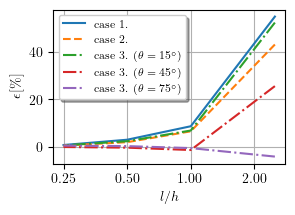

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [45]:
num_patches = (50/dat["patch_size"][:])**2
patch_ratio = dat["patch_size"][:]/2
psize = np.array(dat["patch_size"][:])


# relative error as a function of patch size
f,a = create_fig()
plt.semilogx(patch_ratio[:],dat["col_rel"][:],'-')
plt.semilogx(patch_ratio[:],dat["dif_rel"][:],'--')
plt.semilogx(patch_ratio[:],dat["var_rel_15"][:],'-.')
plt.semilogx(patch_ratio[:],dat["var_rel_45"][:],'-.')
plt.semilogx(patch_ratio[:],dat["var_rel_75"][:],'-.')

plt.ylabel('$\epsilon [\%]$')
plt.xlabel("$ l/h $")
a.xaxis.set_minor_locator(mticker.LogLocator())
a.xaxis.set_major_formatter(mticker.ScalarFormatter())
a.set_xticks([.25,.5,1,2])
plt.legend(["case 1. ","case 2.",
            "case 3. ($\\theta=15^{\circ}$)",
            "case 3. ($\\theta=45^{\circ}$)",
            "case 3. ($\\theta=75^{\circ}$)"],fontsize=8, shadow=True)
plt.show()
export_fig(f,"Figure6",fformat=".eps")



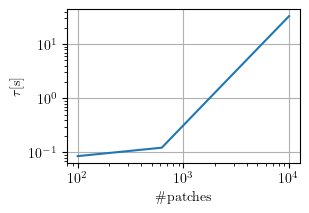

RuntimeError: latex was not able to process the following string:
b'\\n\\\\begin{figure}\\n  \\\\centering\\\\leavevmode\\n  \\\\psfrag{psmarker0}[bl][bl][1][0.000000]{\\\\fontsize{10.000000}{12.500000}\\\\color[rgb]{0,0,0} {\\\\rmfamily $\\\\mathdefault{10^{2}}$}}\\n\\\\psfrag{psmarker1}[bl][bl][1][0.000000]{\\\\fontsize{10.000000}{12.500000}\\\\color[rgb]{0,0,0} {\\\\rmfamily $\\\\mathdefault{10^{3}}$}}\\n\\\\psfrag{psmarker2}[bl][bl][1][0.000000]{\\\\fontsize{10.000000}{12.500000}\\\\color[rgb]{0,0,0} {\\\\rmfamily $\\\\mathdefault{10^{4}}$}}\\n\\\\psfrag{psmarker3}[bl][bl][1][0.000000]{\\\\fontsize{10.000000}{12.500000}\\\\color[rgb]{0,0,0} {\\\\rmfamily $$ \\\\mathrm{\\\\# patches}$$}}\\n\\\\psfrag{psmarker4}[bl][bl][1][0.000000]{\\\\fontsize{10.000000}{12.500000}\\\\color[rgb]{0,0,0} {\\\\rmfamily $\\\\mathdefault{10^{-1}}$}}\\n\\\\psfrag{psmarker5}[bl][bl][1][0.000000]{\\\\fontsize{10.000000}{12.500000}\\\\color[rgb]{0,0,0} {\\\\rmfamily $\\\\mathdefault{10^{0}}$}}\\n\\\\psfrag{psmarker6}[bl][bl][1][0.000000]{\\\\fontsize{10.000000}{12.500000}\\\\color[rgb]{0,0,0} {\\\\rmfamily $\\\\mathdefault{10^{1}}$}}\\n\\\\psfrag{psmarker7}[bl][bl][1][90.000000]{\\\\fontsize{10.000000}{12.500000}\\\\color[rgb]{0,0,0} {\\\\rmfamily $$\\\\tau [\\\\mathrm{s}]$$}}\\n  \\\\includegraphics*[angle=0]{C:/Users/jotag/AppData/Local/Temp/tmp0par7wii/tmp.ps}\\n\\\\end{figure}'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpjgy8bx7n 0a140aea8b6754a0b2c3503c0ce616e8428e38482277e2585257da680d7796c6.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(0a140aea8b6754a0b2c3503c0ce616e8428e38482277e2585257da680d7796c6.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-04>
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Program Files\MiKTeX\tex/latex/psnfss\helvet.sty
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty))
(C:\Program Files\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Program Files\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Program Files\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Program Files\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/graphics\color.sty
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/graphics-cfg\color.cfg)
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/graphics-def\dvips.def)
 (C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/graphics\dvipsnam.def)
 (C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/graphics\mathcolor.ltx
))
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/graphics\graphicx.sty
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/graphics\graphics.sty
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/graphics\trig.sty)
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/graphics-cfg\graphics.c
fg))) (C:\Program Files\MiKTeX\tex/latex/psfrag\psfrag.sty)
(C:\Program Files\MiKTeX\tex/latex/underscore\underscore.sty)
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/firstaid\underscore-ltx
.sty) (C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty
)
(C:\Users\jotag\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file 0a140aea8b6754a0b2c3503c0ce616e8428e38482277e2585257da680d7796c6.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
<C:/Users/jotag/AppData/Local/Temp/tmp0par7wii/tmp.ps>

! LaTeX Error: \mathrm allowed only in math mode.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.41 ...tag/AppData/Local/Temp/tmp0par7wii/tmp.ps}
                                                  
No pages of output.
Transcript written on C:\Users\jotag\.matplotlib\tex.cache\0a\14\tmpjgy8bx7n\0a
140aea8b6754a0b2c3503c0ce616e8428e38482277e2585257da680d7796c6.log.




In [46]:
for code in ["col","dif"]:
    # runtime as a function of patch size
    f,a = create_fig()
    plt.loglog(num_patches,dat[code+"_rt"])
    plt.ylabel('$$\\tau [\mathrm{s}]$$')
    plt.xlabel("$$ \mathrm{\# patches}$$")
    plt.show()
    export_fig(f,code+"_rt")

as a function of angle

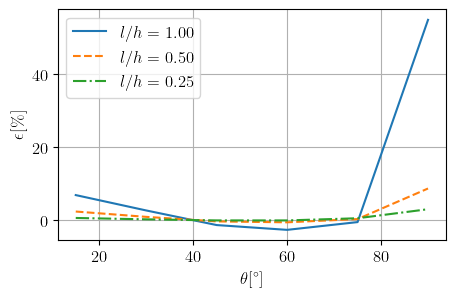

In [ ]:

angles = np.arange(0,90,15)
f,a = create_fig()
legend = []

baba = ["-","--","-."]

for i,ratio in enumerate(patch_ratio[1:]):
    data_list = []
    data_list.append(dat["col_rel"][i+1])
    
    for ang in angles[1:]:
        data_list.append(dat["var_rel_"+f'{ang}'][i+1])


    plt.plot(angles,data_list,baba[i])

    legend.append(f'$$l/h={ratio:.2f}$$')

plt.ylabel('$$\epsilon [\%]$$')
plt.xlabel("$$\\theta [^{\circ}]$$")
plt.legend(legend)
plt.show()
export_fig(f,"var_rel")